In [1]:
import re
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# load merged dataset
data = pickle.load(open('./sps_spotinfo_df.pkl', 'rb'))

# frequency score mapping
frequency_map = {'<5%': 5, '5-10%': 4, '10-15%': 3, '15-20%': 2, '>20%': 1}
data = data.replace({'Frequency': frequency_map})

### 01. Build DF with Instance Class & Date

In [3]:
# check number of available regions by instance family
instance_types = data['InstanceType']
instance_classes = instance_types.str.extract('([a-zA-Z]+)', expand=True)
data['InstanceClass'] = instance_classes

time_spotinfo = data['TimeStamp_spotinfo']
data['Date'] = time_spotinfo.dt.date

class_df = data[['InstanceClass', 'Region', 'Score', 'Frequency', 'Price', 'Date']]

In [4]:
class_df

,InstanceClass,Region,Score,Frequency,Price,Date
0,a,ap-northeast-1,3,1,0.0690,2021-11-23
1,a,ap-northeast-1,3,1,0.0690,2021-11-23
2,a,ap-south-1,3,1,0.0547,2021-11-23
3,a,ap-south-1,3,1,0.0547,2021-11-23
4,a,ap-southeast-1,3,1,0.0646,2021-11-23
...,...,...,...,...,...,...
14875,z,us-west-1,3,1,0.1266,2021-12-09
14876,z,us-west-1,3,1,0.1266,2021-12-09
14877,z,us-west-2,3,1,0.1116,2021-12-09
14878,z,us-west-2,3,1,0.1116,2021-12-09


### 02. Groupby Class & Date

In [5]:
groupby_class = class_df.groupby(by=['InstanceClass', 'Date']).mean().sort_values(by='InstanceClass')

In [6]:
groupby_class

Score  Frequency     Price
InstanceClass Date                                     
a             2021-11-23  2.921601   1.495370  0.062652
              2021-12-09  2.806404   1.500000  0.062732
              2021-12-08  2.831628   1.500000  0.062725
              2021-12-07  2.862634   1.475146  0.062724
              2021-12-06  2.889985   1.464912  0.062715
...                            ...        ...       ...
z             2021-11-24  2.882470   1.000000  0.664012
              2021-11-23  2.882265   1.000000  0.664419
              2021-12-08  2.876401   1.000000  0.660910
              2021-11-30  2.878501   1.000000  0.662302
              2021-12-09  2.879532   1.000000  0.661172

[272 rows x 3 columns]

In [7]:
class_list = sorted(list(set([x[0] for x in list(groupby_class.index)])))
date_list = sorted(list(set([x[1] for x in list(groupby_class.index)])))

In [8]:
heatmap_sps = []
heatmap_fs = []
heatmap_price = []

for i_class in class_list:
    class_sps = []
    class_fs = []
    class_price = []
    for date in date_list:
        condition = (i_class, date)
        class_sps.append(groupby_class.loc[condition]['Score'])
        class_fs.append(groupby_class.loc[condition]['Frequency'])
        class_price.append(groupby_class.loc[condition]['Price'])
    heatmap_sps.append(class_sps)
    heatmap_fs.append(class_fs)
    heatmap_price.append(class_price)

### 03. Class & Date Heatmap Visualization

In [9]:
def heatmap_vis(title, heatmap_data, xlabels, ylabels):
    vmin = 1
    if 'SPS' in title:
        vmax = 3
    elif 'FS' in title:
        vmax = 5
    else:
        print("Title ERROR")
        return 0
    
    plt.figure(figsize=(15, 7))
    heatmap = sb.heatmap(heatmap_data, annot=True, fmt='.3g', vmin=vmin, vmax=vmax)
    heatmap.set_xticklabels(xlabels, rotation='vertical')
    heatmap.set_yticklabels(ylabels, rotation='horizontal')
    heatmap.set_xlabel('Dates')
    heatmap.set_ylabel('Instance Class')
    plt.title(title)
    plt.show()

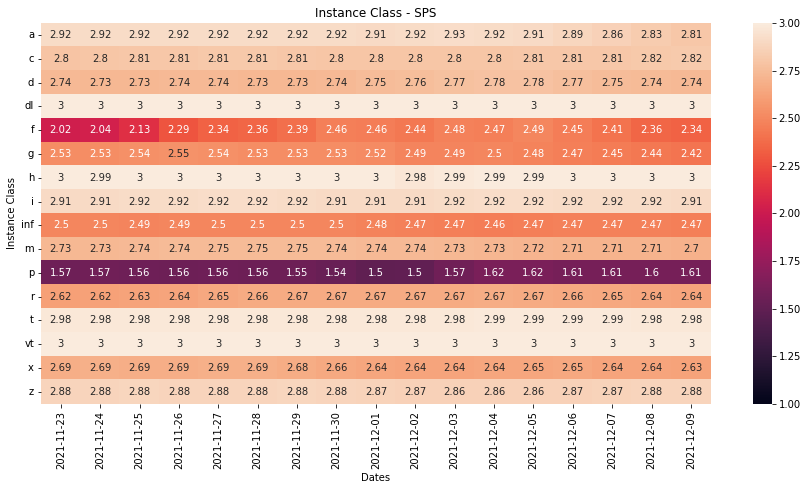

In [10]:
heatmap_vis('Instance Class - SPS', heatmap_sps, date_list, class_list)

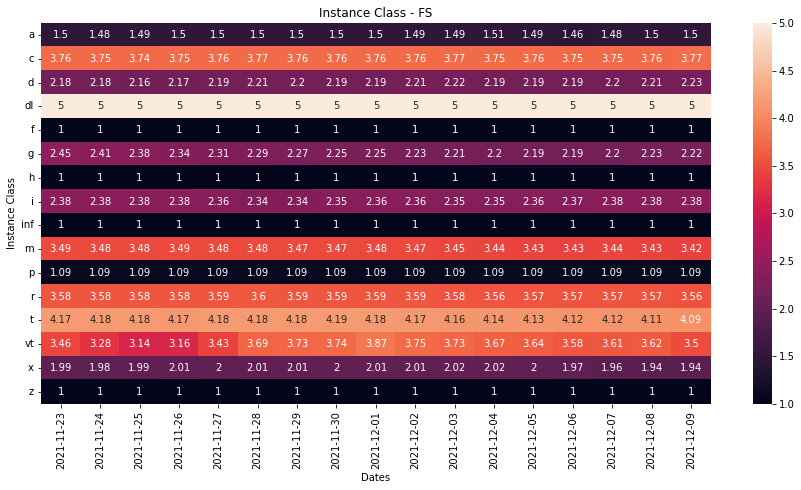

In [11]:
heatmap_vis('Instance Class - FS', heatmap_fs, date_list, class_list)

### 04. Groupby Region & Date

In [12]:
groupby_region = class_df.groupby(by=['Region', 'Date']).mean().sort_values(by=['Region', 'Date'])

In [13]:
region_list = sorted(list(set([x[0] for x in list(groupby_region.index)])))
date_list = sorted(list(set([x[1] for x in list(groupby_region.index)])))

In [14]:
heatmap_sps = []
heatmap_fs = []
heatmap_price = []

for region in region_list:
    class_sps = []
    class_fs = []
    class_price = []
    for date in date_list:
        condition = (region, date)
        class_sps.append(groupby_region.loc[condition]['Score'])
        class_fs.append(groupby_region.loc[condition]['Frequency'])
        class_price.append(groupby_region.loc[condition]['Price'])
    heatmap_sps.append(class_sps)
    heatmap_fs.append(class_fs)
    heatmap_price.append(class_price)

### 05. Region & Date Heatmap Visualization

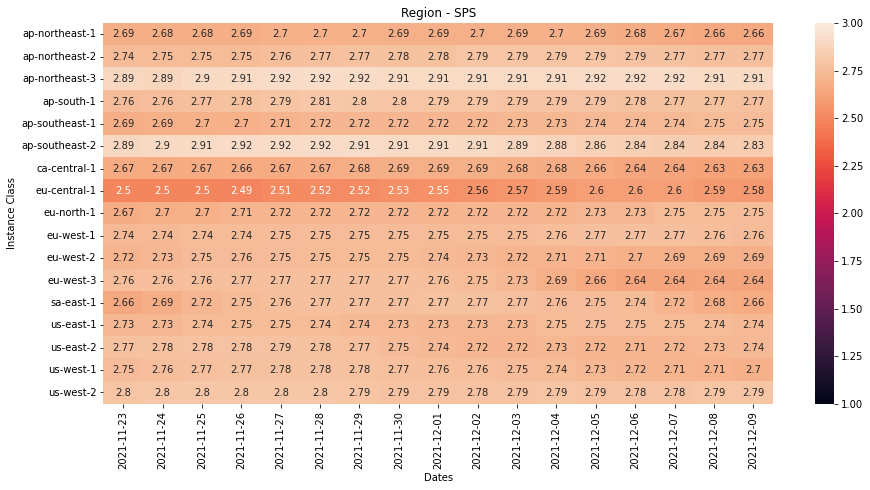

In [15]:
heatmap_vis('Region - SPS', heatmap_sps, date_list, region_list)

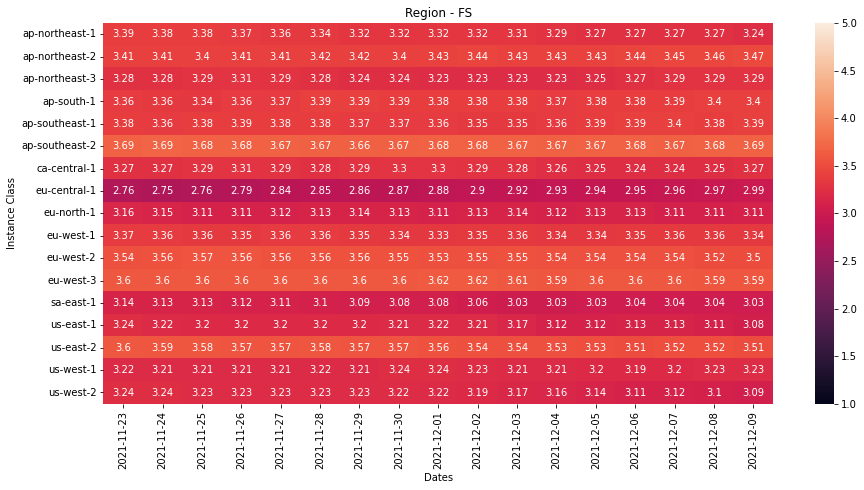

In [16]:
heatmap_vis('Region - FS', heatmap_fs, date_list, region_list)